In [25]:
from sympy import fourier_series, pi, plot
from sympy.abc import x
import numpy as np

In [13]:
f = x
s = fourier_series(f, (x, -pi, pi))
s1 = s.truncate(n=3)
s2 = s.truncate(n=5)
s3 = s.truncate(n=7)
p = plot(f, s1, s2, s3, (x, -pi, pi), show= False, legend=True)

In [14]:
p[0].line_color = (0,0,0)
p[0].label = 'x'
p[1].line_color = (0.7, 0.7, 0.7)
p[1].lable = 'n=3'
p[2].line_color = (0.5, 0.5, 0.5)
p[2].label = 'n=5'
p[3].line_color = (0.3, 0.3, 0.3)
p[3].label = 'n=7'

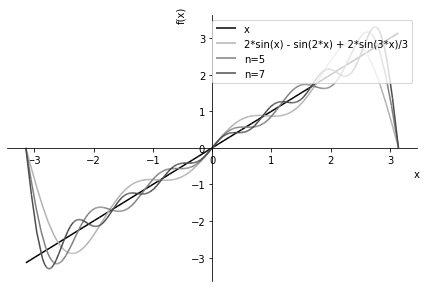

In [15]:
p.show()

In [18]:
### Another example
s1 = fourier_series(x, (x, -1, 1)).truncate(10)
s2 = fourier_series(x, (x, -pi, pi)).truncate(10)
s3 = fourier_series(x, (x, 0, 1)).truncate(10)
p = plot(x, s1, s2, s3, (x, -5, 5), show=False, legend=True)

In [22]:
p[0].line_color = (0, 0, 0)
p[0].label = 'x'
p[1].line_color = (0.7, 0.7, 0.7)
p[1].label = '[-1, 1]'
p[2].line_color = (0.5, 0.5, 0.5)
p[2].label = '[-pi, pi]'
p[3].line_color = (0.3, 0.3, 0.3)
p[3].label = '[0, 1]'

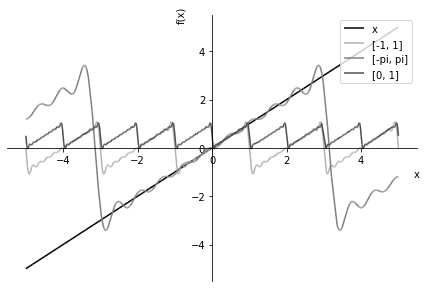

In [23]:
p.show()

In [26]:
### Another example
f = np.sin(x)
s1 = fourier_series(f, (x, -1, 1)).truncate(10)
s2 = fourier_series(f, (x, -pi, pi)).truncate(10)
s3 = fourier_series(f, (x, 0, 1)).truncate(10)
p = plot(f, s1, s2, s3, (x, -5, 5), show=False, legend=True)

p[0].line_color = (0, 0, 0)
p[0].label = 'x'
p[1].line_color = (0.7, 0.7, 0.7)
p[1].label = '[-1, 1]'
p[2].line_color = (0.5, 0.5, 0.5)
p[2].label = '[-pi, pi]'
p[3].line_color = (0.3, 0.3, 0.3)
p[3].label = '[0, 1]'

p.show()

TypeError: loop of ufunc does not support argument 0 of type Symbol which has no callable sin method

In [ ]:
'''https://vcfw.org/pdf/Department/Physics/Fourier_series_python_code.pdf'''

In [27]:
# Example1

import numpy as np
from scipy.signal import square
import matplotlib.pyplot as plt
from scipy.integrate import simps

In [28]:
L = 4   # Periodicity of the periodic function f(x)
freq = 4   # Number of waves in time period L
dutycycle = 0.5
samples = 1000
terms = 100

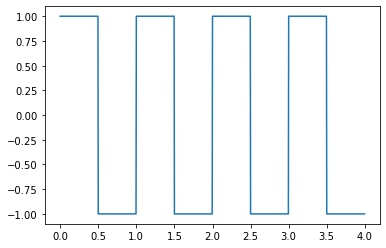

In [29]:
# Generate square wave
x = np.linspace(0, L, samples, endpoint=False)
y = square(2.0 * np.pi * x * freq/L, duty=dutycycle)
plt.plot(x, y)

In [31]:
# Calculation of Fourier coefficients
a0 = 2./L * simps(y, x)
an = lambda n:2.0/L * simps(y * np.cos(2. * np.pi * n * x/L), x)
bn = lambda n:2.0/L * simps(y * np.sin(2. * np.pi * n * x/L), x)

# Sum of the Series
s = a0/2. + sum([an(k) * np.cos(2. * np.pi * k * x/L) + bn(k) * np.sin(2. * np.pi * k * x/L) for k in range(1, terms+1)])

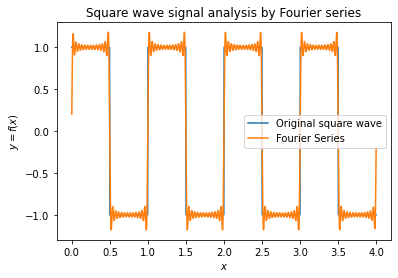

In [34]:
# Plotting
plt.plot(x, y, label = 'Original square wave')
plt.plot(x, s, label='Fourier Series')
plt.xlabel('$x$')
plt.ylabel('$y=f(x)$')
plt.legend(loc='best', prop={'size': 10})
plt.title('Square wave signal analysis by Fourier series')
plt.show()

In [36]:
# Example 2 : Fourier series analysis for a sawtooth wave function
import numpy as np
from scipy.signal import square,sawtooth
import matplotlib.pyplot as plt
from scipy.integrate import simps

L = 1
freq = 2
width_range = 1
samples = 1000
terms = 50

In [37]:
# Generate sawtooth function
x = np.linspace(0, L, samples, endpoint=False)
y = sawtooth(2.0 * np.pi * x * freq/L, width = width_range)

# Calculation of coefficients
a0 = 2./L*simps(y, x)
an = lambda n: 2.0 / L * simps(y * np.cos(2.*np.pi * n * x/L), x)
bm = lambda n: 2.0 / L * simps(y * np.sin(2.*np.pi * n * x/L), x)

# Sum of the series
s = a0/2. + sum([an(k)*np.cos(2. * np.pi * k * x/L) + bn(k)*np.sin(2.*np.pi*k*x/L) for k in range(1, terms+1)])

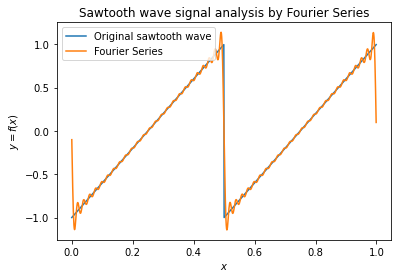

In [38]:
# Plotting
plt.plot(x, y, label = 'Original sawtooth wave')
plt.plot(x, s, label = 'Fourier Series')
plt.xlabel('$x$')
plt.ylabel('$y=f(x)$')
plt.legend(loc='best', prop={'size': 10})
plt.title('Sawtooth wave signal analysis by Fourier Series')
plt.show()

In [39]:
# Example 6: Fourier Series Analysis for a Arbitrary Waves function

L = 1.0   # half wavelength, Wavelength = 2L
freq = 2   # frequency
samples = 1001
terms = 300

In [42]:
# Generate Wave
x = np.linspace(-L, L, samples, endpoint=False)
F=lambda x: np.array([u**2 if -L<=u<0 else 1 if 0<u<0.5 else 0 for u in x])
f=lambda x: F(freq*x%(2*L)-L)

a0 = 1./L * simps(f(x), x)
an = lambda n: 1.0/L * simps(f(x) * np.cos(1.*np.pi*n*x/L), x)
bn = lambda n: 1.0/L * simps(f(x) * np.sin(1.*np.pi*n*x/L), x)

# Series Sum
xp = x
s = a0/2. + sum([an(k) * np.cos(1. * np.pi * k * xp/L) + bn(k)*np.sin(1.*np.pi*k*xp/L) for k in range(1, terms+1)])

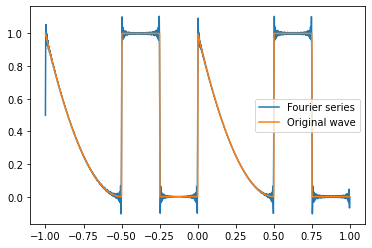

In [43]:
#Plotting
plt.plot(xp,s,label="Fourier series")
plt.plot(xp,f(xp),label="Original wave")
plt.legend(loc='best',prop={'size':10})
plt.show()

In [ ]:
'''https://alice-secreta.tistory.com/23'''

In [ ]:
fs = 2000.